<a href="https://colab.research.google.com/github/Thulisile2/Demo_GitHub/blob/main/Bungee%20Jump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

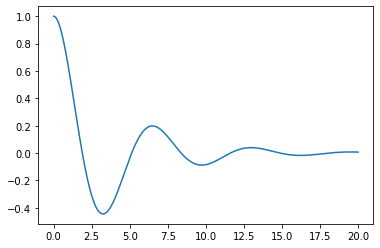

In [55]:

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
#Define variables

m=2
k=2
c=1
F0=1
delta_t=0.001
omega=1.0
#Initial values
A= np.array([[m,0],[0,1]])
B= np.array([[c,k],[-1,0]])
y=np.array([0,1])
F=np.array([0,0])
time=np.arange(0.0 , 20 , delta_t)
Y=[]
force=[]
for t in time:
    F[0]=F0*np.cos(omega*t)
    y = y + delta_t*inv(A).dot(F-B.dot(y))
    Y.append(y[1])
    force.append(F[0])

#plotting

t=[i for i in time]

plt.plot(t,Y)

In [57]:


# In[20]:


import numpy as np
# y'=2xy is our function

# y[n+1]=y[n]+(h/6)*(k1+2*k2+2*k3+k4)
#k1=y'(x[n],y[n])
#k2=y'(x[n]+h/2,y[n]+hk1/2)
#k3=y'(x[n]+h/2,y[n]+hk2/2)
#k4=y'(x[n]+h,y[n]+hk3)

#initial state
n=0

y=[1]
x=[1]
#time step increment

h=0.1

while n<=20:
    k1=2*x[n]*y[n]
    k2=2*(x[n]+h/2)*(y[n]+h*k1/2)
    k3=2*(x[n]+h/2)*(y[n]+h*k2/2)
    k4=2*(x[n]+h)*(y[n]+h*k3)
    ynew=y[n]+(h/6)*(k1+2*k2+2*k3+k4)
    y.append(ynew)
    xnew=x[n]+h
    x.append(xnew)
    n=n+1
print(y)

while n<=-20:
    k1=2*x[n]*y[n]
    k2=2*(x[n]+h/2)*(y[n]+h*k1/2)
    k3=2*(x[n]+h/2)*(y[n]+h*k2/2)
    k4=2*(x[n]+h)*(y[n]+h*k3)
    xnew=y[n]+(h/6)*(k1+2*k2+2*k3+k4)
    xnew=x[n]+h
    x.append(xnew)
    n=n+1
print(x)

[1, 1.23367435, 1.5526953980477614, 1.9936867693499598, 2.611633233219414, 3.49021063637295, 4.7585516692062715, 6.618827405443388, 9.39225232585493, 13.596905373893716, 20.08126682732256, 30.256716495204635, 46.50835221616406, 72.93185161310467, 116.67536343033214, 190.42109641063837, 317.0466030226732, 538.5193057111578, 933.1412267561079, 1649.5253921392823, 2974.634144195885, 5472.278911288666]
[1, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004, 1.6000000000000005, 1.7000000000000006, 1.8000000000000007, 1.9000000000000008, 2.000000000000001, 2.100000000000001, 2.200000000000001, 2.300000000000001, 2.4000000000000012, 2.5000000000000013, 2.6000000000000014, 2.7000000000000015, 2.8000000000000016, 2.9000000000000017, 3.0000000000000018, 3.100000000000002]


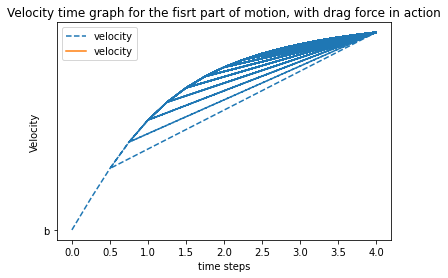

In [73]:

# dissociates into :dy/dt=v and dv/dt=g-(mu/m)*v^2, of which they are now two functions, this is only valid for the unrestrained path of the mass, where only FD and mg are the only forces acting on it.

# for the other part of the journey, y will vary in a pendulum sense. The mass moves as if it was excecuting some circular motion
# the new differential equations will be: dy/dt=v and dv/dt=g*(y/l)-(mu/m)*v^2, derived from: mgsin(theta)-mu*(v^2)=md^2y/dt^2
# the runge kutta is as follows:
#y[n+1]=y[n]+(1/6)*(k1+2*k2+2*k3+k4)
#k1=h*y'(t[n],y[n],v[n])
#l1=h*v'(t[n],y[n],v[n])
#k2=h*y'(t[n]+h/2,y[n]+k1/2,v[n]+l1/2)
#l2=h*v'(t[n]+h/2,y[n]+k1/2,v[n]+l1/2)
#k3=h*y'(t[n]+h/2,y[n]+k2/2,v[n]+l2/2)
#l3=h*v'(t[n]+h/2,y[n]+k2/2,v[n]+l2/2)
#k4=h*y'(t[n]+h,y[n]+k1,v[n]+l1)
#l4=h*v'(t[n]+h,y[n]+k3,v[n]+l3)

# importing all the useful libraries
import numpy as np #handling lists
import matplotlib.pyplot as plt # for plotting

# initial states and variables
# Non zero drag
L=60
d=40
k=10 #N.m^-1
g=9.8 #m/s^2
m=90 #kg
mu=0.770
fg=m*g

n=0
y=[0] # y list with one element, the initial state
v=[0] # v list with one element, the initial state
t=[0] # x list with one element, the initial state
N=480 # number of time steps
delta_t=0.25 #length of each time interval
v1=[]
EK1=[0]
EP1=[m*g*56.57] # approximate height before pendulum like motion
Total_E=[]

# for the second part of the motion (pendulum like), we need its total kinetic energy

EK2=[]
#EP2=[m*g*(h2-y)]
#Total_E2
for n in range(N):
    while t[n]<4:
        k1=delta_t*(v[n])
        l1=delta_t*(g-(mu/m)*(v[n])**2)
        k2=delta_t*(v[n]+l1/2)
        l2=delta_t*(g-(mu/m)*(v[n]+l1/2)**2)
        k3=delta_t*(v[n]+l2/2)
        l3=delta_t*(g-(mu/m)*(v[n]+l2/2)**2)
        k4=delta_t*(v[n]+l3)
        l4=delta_t*(g-(mu/m)*(v[n]+l3)**2)
        ynew=y[n]+(1/6)*(k1+2*k2+2*k3+k4)
        y.append(ynew)
        vnew=v[n]+(1/6)*(l1+2*l2*2*l3+l4)
        v.append(vnew)
        EK1new=(0.5)*m*v[n]**2
        EK1.append(EK1new)
        EP1new=m*g*(56.57-y[n])
        EP1.append(EP1new)
        Total_Enew=EP1[n]-(mu)*(v[n]**2)*(y[n]) # This energy is the same as our change in kinetic energy as it represents the net work done (by Work-Energy-Theorem)
        Total_E.append(Total_Enew)
        tnew=t[n]+delta_t
        t.append(tnew)
        n=n+1
   
#print(y)
plt.plot(t,v,'--','b',label='velocity' )
#plt.grid()
plt.xlabel('time steps')
plt.title('Velocity time graph for the fisrt part of motion, with drag force in action')
plt.ylabel('Velocity')
#print(Total_E)
#plt.plot(t,Total_E, label='E')
plt.legend()

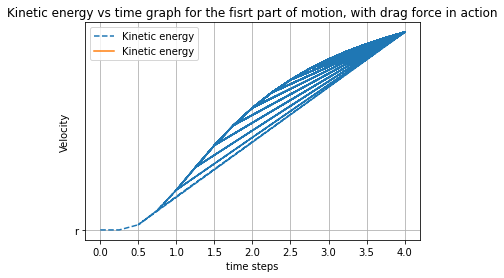

In [61]:

#print(y)
plt.plot(t,EK1,'--','r',label='Kinetic energy')
plt.grid(True)
plt.xlabel('time steps')
plt.title('Kinetic energy vs time graph for the fisrt part of motion, with drag force in action')
plt.ylabel('Velocity')
#print(Total_E)
#plt.plot(t,Total_E, label='E')
plt.legend()


ValueError: ignored

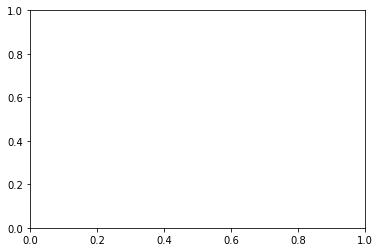

In [13]:
plt.plot(t,EP1,label='Potential energy')
plt.grid(True)
plt.xlabel('time (s)')
plt.title('Potentail energy vs time graph for the fisrt part of motion, with drag force in action')
plt.ylabel('Potential energy (J)')
#print(Total_E)
#plt.plot(t,Total_E, label='E')
plt.legend()
#plt.savefig(r'C:\Users\mich9\Downloads\potentail_energy_with_drag.png', dpi=100,bbox_inches='tight')


# ## The energy starts constant for the corresponding seconds close to 3, and then falls as the motion progresses

# ### This code can be merged with that one on top to produce the required results. What will remain is the last part when the spring constant is actively influencing the motion

# In[ ]:
 #for the second part of the motion, which is pendulum like:
if t[n]>3:
  k1=delta_t*(v[n])
  l1=delta_t*(g*y[n-1]/L-(mu/m)*(v[n])**2)
  k2=delta_t*(v[n]+l1/2)
  l2=delta_t*(g*(y[n-1]+k1/2)/L-(mu/m)*(v[n]+l1/2)**2)
  k3=delta_t*(v[n]+l2/2)
  l3=delta_t*(g*(y[n-1]+k2/2)/L-(mu/m)*(v[n]+l2/2)**2)
  k4=delta_t*(v[n]+l3)
  l4=delta_t*(g*(y[n-1]+k3)/L-(mu/m)*(v[n]+l3)**2)
  ynew=y[n]+(1/6)*(k1+2*k2+2*k3+k4)
  y.append(ynew)
  vnew=v[n]+(1/6)*(l1+2*l2*2*l3+l4)
  v.append(vnew)
  tnew=t[n]+delta_t
  t.append(tnew)
  n=n+1    


# In[58]:


#(dy^2/dt^2)=g-(mu/m)*(dy/dt)^2
# dissociates into :dy/dt=v and dv/dt=g-(mu/m)*v^2, of which they are now two functions, this is only valid for the unrestrained path of the mass, where only FD and mg are the only forces acting on it.

# for the other part of the journey, y will vary in a pendulum sense. The mass moves as if it was excecuting some circular motion
# the new differential equations will be: dy/dt=v and dv/dt=g*(y/l)-(mu/m)*v^2, derived from: mgsin(theta)-mu*(v^2)=md^2y/dt^2
# the runge kutta is as follows:
#y[n+1]=y[n]+(1/6)*(k1+2*k2+2*k3+k4)
#k1=h*y'(t[n],y[n],v[n])
#l1=h*v'(t[n],y[n],v[n])
#k2=h*y'(t[n]+h/2,y[n]+k1/2,v[n]+l1/2)
#l2=h*v'(t[n]+h/2,y[n]+k1/2,v[n]+l1/2)
#k3=h*y'(t[n]+h/2,y[n]+k2/2,v[n]+l2/2)
#l3=h*v'(t[n]+h/2,y[n]+k2/2,v[n]+l2/2)
#k4=h*y'(t[n]+h,y[n]+k1,v[n]+l1)
#l4=h*v'(t[n]+h,y[n]+k3,v[n]+l3)

Text(30.375, 0.5, 'Kinetic energy (J)')

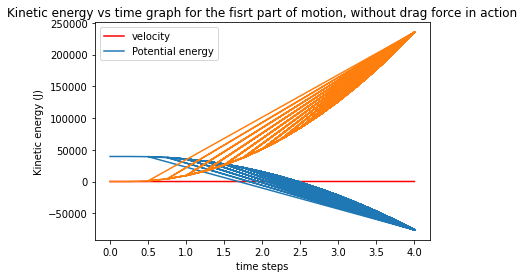

In [72]:
# importing all the useful libraries
import numpy as np #handling lists
import matplotlib.pyplot as plt # for plotting

# initial states and variables

L=60
d=40
k=10 #N.m^-1
g=9.8 #m/s^2
m=90 #kg
mu=0.0
fg=m*g

n=0
y=[0] # y list with one element, the initial state
v=[0] # v list with one element, the initial state
t=[0] # x list with one element, the initial state
N=180 # number of time steps
delta_t=0.25 #length of each time interval
v1=[]
EK1=[0]
EP1=[m*g*44.7] # approximate height before pendulum like motion
Total_E=[]

# for the second part of the motion (pendulum like), we need its total kinetic energy

EK2=[]
#EP2=[m*g*(h2-y)]
#Total_E2
for n in range(N):
    while t[n]<4:
        k1=delta_t*(v[n])
        l1=delta_t*(g-(mu/m)*(v[n])**2)
        k2=delta_t*(v[n]+l1/2)
        l2=delta_t*(g-(mu/m)*(v[n]+l1/2)**2)
        k3=delta_t*(v[n]+l2/2)
        l3=delta_t*(g-(mu/m)*(v[n]+l2/2)**2)
        k4=delta_t*(v[n]+l3)
        l4=delta_t*(g-(mu/m)*(v[n]+l3)**2)
        ynew=y[n]+(1/6)*(k1+2*k2+2*k3+k4)
        y.append(ynew)
        vnew=v[n]+(1/6)*(l1+2*l2*2*l3+l4)
        v.append(vnew)
        EK1new=(0.5)*m*v[n]**2
        EK1.append(EK1new)
        EP1new=m*g*(44.7-y[n])
        EP1.append(EP1new)
        Total_Enew=EP1[n]-(mu)*(v[n]**2)*(y[n]) # This energy is the same as our change in kinetic energy as it represents the net work done (by Work-Energy-Theorem)
        Total_E.append(Total_Enew)
        tnew=t[n]+delta_t
        t.append(tnew)
        n=n+1
   
#print(y)
plt.plot(t,v,'r-',label='velocity' )
plt.xlabel('time (s)')
plt.title('Velocity time graph for the fisrt part of motion, without drag force in action')
plt.ylabel('Velocity (m/s)')
#print(Total_E)
#plt.plot(t,Total_E, label='E')
plt.legend()
plt.savefig(r'C:\Users\mich9\Downloads\velocity_without_drag.png', dpi=100,bbox_inches='tight')


# In[57]:


plt.plot(t,EP1,label='Potential energy')
plt.xlabel('time steps')
plt.title('Potentail energy vs time graph for the fisrt part of motion, without drag force in action')
plt.ylabel('Potential energy(J)')
#print(Total_E)
#plt.plot(t,Total_E, label='E')
plt.legend()
#plt.savefig(r'C:\Users\mich9\Downloads\Potential_energy_without_drag.png', dpi=100,bbox_inches='tight')


# In[56]:


plt.plot(t,EK1,label='Kinetic energy')
plt.xlabel('time steps')
plt.title('Kinetic energy vs time graph for the fisrt part of motion, without drag force in action')
plt.ylabel('Kinetic energy (J)')
#plt.savefig(r'C:\Users\mich9\Downloads\kinetic_energy_without_drag.png', dpi=100,bbox_inches='tight')

